# Data Preprocessing :
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  


In [26]:
# Load the dataset.
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/Online%20retail.csv')

df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [28]:
missing_values = df.isnull().sum()  # Handling the missing values

missing_values

,0
"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil",0


In [29]:
df = df.drop_duplicates()   # Remove the duplicates.

In [30]:
transaction = df.iloc[:, 0].apply(lambda x: x.split(',')) # Convert the data to a list of lists (each transaction is a list of items)

transaction

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"[burgers, meatballs, eggs]"
1,[chutney]
2,"[turkey, avocado]"
3,"[mineral water, milk, energy bar, whole wheat ..."
4,[low fat yogurt]
...,...
7492,"[burgers, salmon, pancakes, french fries, froz..."
7493,"[turkey, burgers, dessert wine, shrimp, pasta,..."
7495,"[butter, light mayo, fresh bread]"
7496,"[burgers, frozen vegetables, eggs, french frie..."


# Association Rule Mining :
•	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.                                                          
•	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.          
•	Set appropriate threshold for support, confidence and lift to extract meaning full rules.


In [31]:
!pip install mlxtend

In [32]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

te = TransactionEncoder()   # Convert the transactions to a one-hot encoded dataframe
te_ary = te.fit(transaction).transform(transaction)
df_encoded = pd.DataFrame(te_ary, columns = te.columns_)

In [33]:
frequent_itemsets = apriori(df_encoded, min_support = 0.01, use_colnames = True)  # Apply the Apriori algorithm with a minimum support threshold.

frequent_itemsets
#print(frequent_itemsets.head())

,support,itemsets
0,0.029179,(almonds)
1,0.011014,(antioxydant juice)
2,0.045797,(avocado)
3,0.012560,(bacon)
4,0.015459,(barbecue sauce)
...,...,...
431,0.014686,"(olive oil, spaghetti, mineral water)"
432,0.016618,"(spaghetti, mineral water, pancakes)"
433,0.012367,"(shrimp, spaghetti, mineral water)"
434,0.010821,"(soup, spaghetti, mineral water)"


In [34]:
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)  # Association rules with specific thresholds for confidence and lift.

rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1.2 )] # Filter rules based on confidence and lift thresholds

rules_sorted = rules.sort_values(by = 'lift', ascending = False)  # Sort the rules by lift.

rules_sorted    # Display the rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
717,"(ground beef, frozen vegetables)",(spaghetti),0.024541,0.229565,0.012560,0.511811,2.229480,0.006927,1.578149,0.565339
792,"(milk, soup)",(mineral water),0.021449,0.299710,0.012367,0.576577,1.923781,0.005939,1.653876,0.490716
710,"(ground beef, frozen vegetables)",(mineral water),0.024541,0.299710,0.013333,0.543307,1.812775,0.005978,1.533393,0.459640
828,"(soup, spaghetti)",(mineral water),0.020676,0.299710,0.010821,0.523364,1.746235,0.004624,1.469236,0.436362
763,"(ground beef, pancakes)",(mineral water),0.020870,0.299710,0.010821,0.518519,1.730067,0.004566,1.454448,0.430982
498,"(chicken, chocolate)",(mineral water),0.021256,0.299710,0.011014,0.518182,1.728943,0.004644,1.453432,0.430768
774,"(milk, olive oil)",(mineral water),0.024155,0.299710,0.012367,0.512000,1.708317,0.005128,1.435020,0.424892
598,"(olive oil, chocolate)",(mineral water),0.023575,0.299710,0.011981,0.508197,1.695627,0.004915,1.423923,0.420153
750,"(milk, ground beef)",(mineral water),0.031691,0.299710,0.016039,0.506098,1.688623,0.006541,1.417871,0.421148
666,"(ground beef, eggs)",(mineral water),0.028792,0.299710,0.014493,0.503356,1.679475,0.005863,1.410043,0.416570


In [35]:
#OR

# Association rules from the frequent itemsets.
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)  # Setting thresholds for confidence (e.g., 0.2) and lift (e.g., 1.0)

rules = rules[rules['lift'] > 1]

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(almonds),(mineral water),0.029179,0.299710,0.010821,0.370861,1.237399,0.002076,1.113092,0.197619
1,(avocado),(chocolate),0.045797,0.205217,0.010242,0.223629,1.089716,0.000843,1.023715,0.086281
2,(avocado),(french fries),0.045797,0.192657,0.011594,0.253165,1.314069,0.002771,1.081019,0.250476
3,(avocado),(milk),0.045797,0.170048,0.010821,0.236287,1.389528,0.003034,1.086732,0.293786
4,(avocado),(mineral water),0.045797,0.299710,0.015845,0.345992,1.154421,0.002120,1.070766,0.140185
...,...,...,...,...,...,...,...,...,...,...
350,"(shrimp, mineral water)",(spaghetti),0.033430,0.229565,0.012367,0.369942,1.611491,0.004693,1.222800,0.392580
351,"(soup, spaghetti)",(mineral water),0.020676,0.299710,0.010821,0.523364,1.746235,0.004624,1.469236,0.436362
352,"(soup, mineral water)",(spaghetti),0.033430,0.229565,0.010821,0.323699,1.410054,0.003147,1.139190,0.300865
353,"(spaghetti, tomatoes)",(mineral water),0.029952,0.299710,0.013527,0.451613,1.506832,0.004550,1.276999,0.346742


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

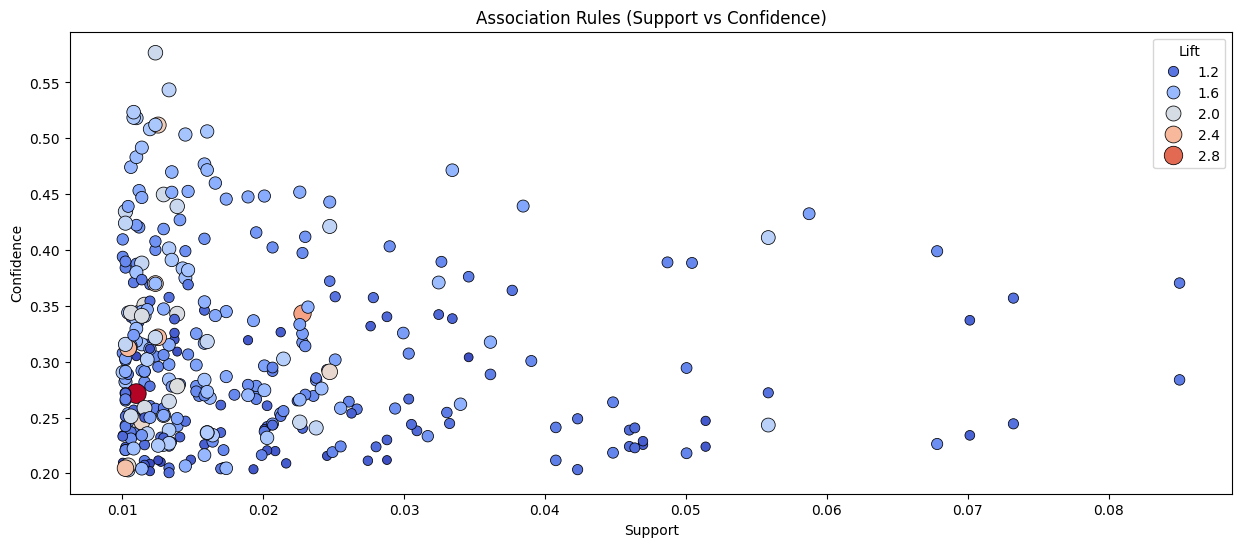

In [37]:
# Visualization.
# Scatter plot for Support vs Confidence with Lift as bubble size
plt.figure(figsize=(15,6))
sns.scatterplot(x="support", y="confidence", size="lift", data = rules, hue="lift", palette="coolwarm", sizes=(40, 200), edgecolor="black")
plt.title("Association Rules (Support vs Confidence)")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

In [38]:
top_10_rules = rules.nlargest(10, 'lift')  # Top 10 rules based on lift.

top_10_rules   # Display the top 10 rules.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
176,(whole wheat pasta),(olive oil),0.040580,0.087536,0.011014,0.271429,3.100757,0.007462,1.252401,0.706154
126,(herb & pepper),(ground beef),0.066473,0.135845,0.022802,0.343023,2.525100,0.013772,1.315350,0.646983
313,"(shrimp, mineral water)",(frozen vegetables),0.033430,0.129855,0.010435,0.312139,2.403747,0.006094,1.265001,0.604181
305,"(spaghetti, frozen vegetables)",(ground beef),0.039034,0.135845,0.012560,0.321782,2.368738,0.007258,1.274155,0.601306
343,"(milk, spaghetti)",(olive oil),0.050048,0.087536,0.010242,0.204633,2.337697,0.005861,1.147224,0.602377
304,"(ground beef, frozen vegetables)",(spaghetti),0.024541,0.229565,0.012560,0.511811,2.229480,0.006927,1.578149,0.565339
338,"(soup, mineral water)",(milk),0.033430,0.170048,0.012367,0.369942,2.175512,0.006682,1.317263,0.559026
190,"(french fries, eggs)",(burgers),0.046377,0.113816,0.011401,0.245833,2.159911,0.006123,1.175050,0.563134
330,"(spaghetti, mineral water)",(ground beef),0.085024,0.135845,0.024734,0.290909,2.141472,0.013184,1.218680,0.582563
314,"(frozen vegetables, mineral water)",(shrimp),0.050435,0.098744,0.010435,0.206897,2.095283,0.005455,1.136366,0.550502


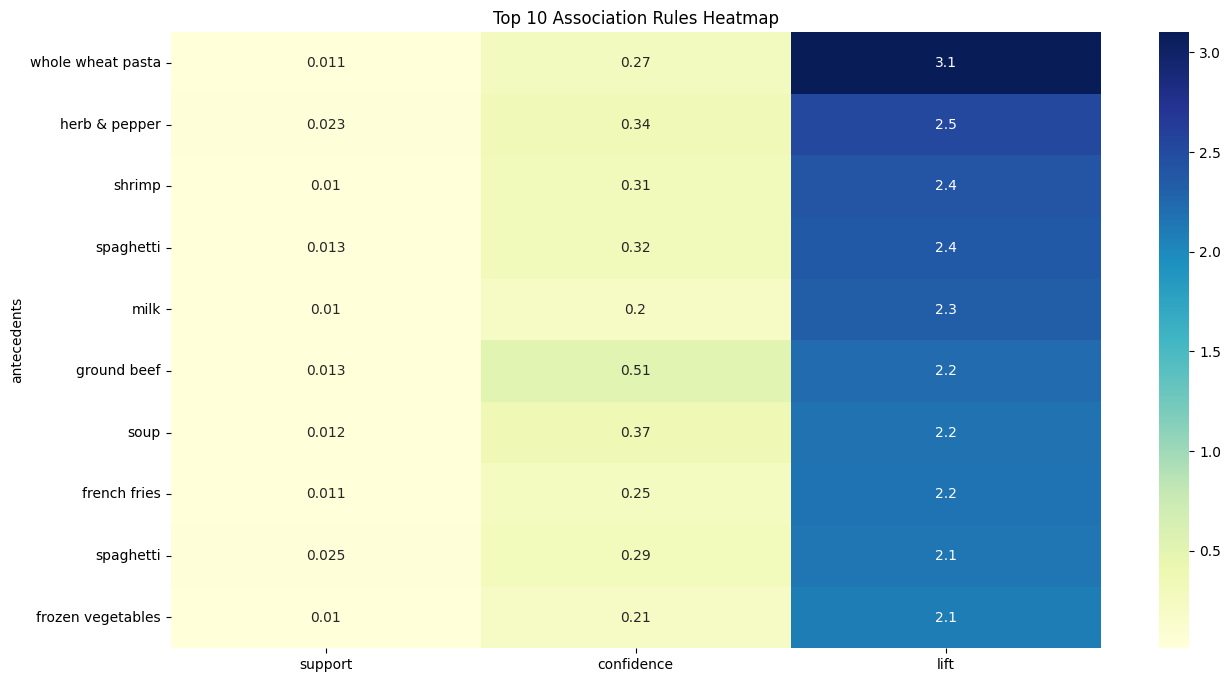

In [39]:
# Visualize the top 10 rules with a heatmap
plt.figure(figsize=(15, 8))  # Set the figure size
sns.heatmap(top_10_rules[['support', 'confidence', 'lift']].set_index(top_10_rules['antecedents'].apply(lambda x: list(x)[0])), annot=True, cmap="YlGnBu")
plt.title('Top 10 Association Rules Heatmap')
plt.show()  # Display the heatmap

In [40]:
# Print top 10 rules
top_10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]  # Display the top 10 rules with relevant columns.

,antecedents,consequents,support,confidence,lift
176,(whole wheat pasta),(olive oil),0.011014,0.271429,3.100757
126,(herb & pepper),(ground beef),0.022802,0.343023,2.525100
313,"(shrimp, mineral water)",(frozen vegetables),0.010435,0.312139,2.403747
305,"(spaghetti, frozen vegetables)",(ground beef),0.012560,0.321782,2.368738
343,"(milk, spaghetti)",(olive oil),0.010242,0.204633,2.337697
304,"(ground beef, frozen vegetables)",(spaghetti),0.012560,0.511811,2.229480
338,"(soup, mineral water)",(milk),0.012367,0.369942,2.175512
190,"(french fries, eggs)",(burgers),0.011401,0.245833,2.159911
330,"(spaghetti, mineral water)",(ground beef),0.024734,0.290909,2.141472
314,"(frozen vegetables, mineral water)",(shrimp),0.010435,0.206897,2.095283


# Analysis and Interpretation:

**1 - Analyse the generated rules to identify interesting patterns and relationships between the products.**

**Analyzing the Generated Rules :**

Strong Rules:
Look for rules with high confidence and lift. These rules indicate strong associations that are both frequent and significant.
Ex: If a rule like milk and bread has a high confidence and lift, it suggests that customers who buy milk are significantly more likely to buy bread compared to the average customer.

**Interesting Patterns :**

Complementary Products: Rules that show how certain products are frequently purchased together can suggest complementary products. Retailers can use this information for product placement or bundling offers.

Substitute Products: If two products appear together less frequently than expected (low lift), they might be substitutes for each other.

High-Value Products: If high-value or high-margin items are frequently associated with other products, it might suggest opportunities for cross-selling or upselling.

Example :

Market Basket Insights :  A rule like avocado, milk and bread might suggest that customers who purchase avocados and milk together are likely to buy bread as well. This can help in designing store layouts to place these items near each other.


---



**2 -	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.**

**Interpretation of Results :**

Customer Preferences: The patterns reveal what customers prefer to buy together, offering insights into how to stock shelves or design promotions.

Product Relationships: Understanding which products are often bought together can help in inventory management and reducing out-of-stock situations for commonly paired items.

Strategic Decisions: Retailers can use these insights for making data-driven decisions regarding pricing, promotions, and store layout to enhance customer experience and boost sales.

# Interview Questions:

**1.	What is lift and why is it important in Association rules?**

Ans - Lift is used to compare the strength of the association between two items to the expected strength of the association if the items were independent. A lift value greater than 1 indicates that the association between two items is stronger than expected based on the frequency of the individual items.

Formula:
Lift (X→Y) = Support(X∪Y) / Support(X) × Support(Y)

Importance:

Interpretation of Relationships: Lift helps identify the strength and direction of the relationship between items. A lift value greater than 1 suggests that the occurrence of the antecedent (X) increases the likelihood of the consequent (Y), indicating a positive association. Conversely, a lift value less than 1 suggests a negative association.                                                 
Comparison to Randomness: Lift allows us to compare the rule against what would be expected by chance. If lift is exactly 1, it implies no correlation, meaning the items are independent of each other.                                         
Decision-Making: In retail or marketing, a high lift value can be used to make decisions about product placement, bundling, and promotions, as it signifies strong relationships between products.


---




**2.	What is support and Confidence. How do you calculate them?**

Support and Confidence are fundamental metrics used in association rule mining to evaluate the usefulness and reliability of rules.

**Support:**

Def: Support is the proportion of transactions in the dataset that contain a specific itemset. It gives an idea of how frequently an itemset appears in the dataset.

Formula:
Support(X)= Number of transactions containing X / Total number of transactions

Ex: If "milk" appears in 200 out of 1000 transactions, the support for "milk" is 0.2 (or 20%).

**Confidence:**

Def: Confidence is the proportion of transactions containing item X that also contain item Y. It measures the reliability of the inference made by the rule.

Formula:  Confidence(X→Y) = Support(X∪Y) / Support(X)

Ex: If out of 200 transactions containing "milk," 150 also contain "bread," the confidence of the rule "milk -> bread" is 150/200 = 0.75 (or 75%).

**Why These Metrics Matter :**

Support helps filter out the less common itemsets, focusing on those that occur frequently.                                                                      
Confidence indicates the likelihood that the rule will be true in future data.



---




**3.	What are some limitations or challenges of Association rules mining?**

Limitations or Challenges :

**Data Sparsity:**

Challenge: In large datasets, many itemsets might have low support, leading to sparse data. This makes it challenging to find meaningful patterns.              
Solution: Adjusting support thresholds or using dimensionality reduction techniques can help manage sparsity.

**Interpretability of Rules:**

Challenge: As the number of generated rules increases, it becomes difficult to interpret and use them effectively. Not all rules will be actionable or interesting.                                                                    
Solution: Post-processing techniques like pruning based on lift or using additional metrics like conviction can help narrow down to the most meaningful rules.

**Setting Thresholds:**

Challenge: Deciding on appropriate support, confidence, and lift thresholds can be tricky. Too high a threshold might miss interesting patterns, while too low might result in an overwhelming number of rules.                                 
Solution: Experimentation and domain knowledge are crucial in setting these thresholds.

**Interpretation in Context:**

Challenge: The context in which items are associated matters. A rule that makes sense in one context might be meaningless in another.                            
Solution: Contextual analysis and domain knowledge are necessary to interpret and act on the discovered rules effectively.


---


